# Problem: Predicting residential utility costs based on attributes of the house. 

## Data Storytelling and Statistical Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

Let's read the file with previously cleaned data:

In [2]:
df = pd.read_csv("data/cleaned.csv", index_col = 0)

In [3]:
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

### Predictors

As one of the largest energy consumption factors of residential dwellings is heating/cooling, let’s take a look into square footage of the houses.
 
The mean size of the house is 2081 sq ft. The distribution of total square footage" is very right-skewed.
 
The average heated area is 1815 sq ft, also right-skewed. A lot of houses don’t have heating at all.
 
Average cooled area is much smaller - 1454 sq ft, much more houses don’t have cooling systems, or have it in only small parts of the homes. 
 
Cooled vs. heated square footage plot shows that many houses have cooled areas the same as heating, but a lot of them have heated areas larger than cooling. A small fraction of households has a cooled area larger than heated. 
 



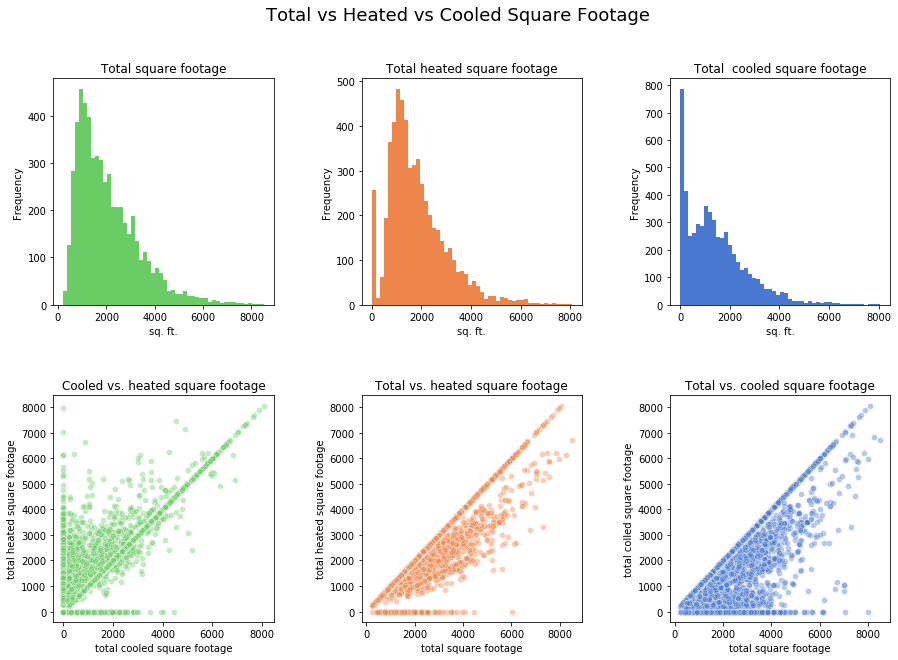

In [4]:
sns.set_palette("muted")

plt.subplots(2, 3, figsize=(15, 10))
plt.suptitle("Total vs Heated vs Cooled Square Footage", fontsize=18)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.subplot(231)
plt.hist("total square footage", data=df, bins=50, color="C2")
plt.title("Total square footage")
plt.xlabel("sq. ft.")
plt.ylabel("Frequency")

plt.subplot(232)
plt.hist("total heated square footage", data=df, bins=50, color="C1")
plt.title("Total heated square footage")
plt.xlabel("sq. ft.")
plt.ylabel("Frequency")

plt.subplot(233)
plt.hist("total cooled square footage", data=df, bins=50, color="C0")
plt.title("Total  cooled square footage")
plt.xlabel("sq. ft.")
plt.ylabel("Frequency")


plt.subplot(234)
sns.scatterplot(
    x="total cooled square footage",
    y="total heated square footage",
    data=df,
    alpha=0.4,
    color="C2",
)
plt.title("Cooled vs. heated square footage")
plt.xlabel("total cooled square footage")
plt.ylabel("total heated square footage")


plt.subplot(235)
sns.scatterplot(
    x="total square footage",
    y="total heated square footage",
    data=df,
    alpha=0.4,
    color="C1",
)
plt.title("Total vs. heated square footage")
plt.xlabel("total square footage")
plt.ylabel("total heated square footage")


plt.subplot(236)
sns.scatterplot(
    x="total square footage",
    y="total cooled square footage",
    data=df,
    alpha=0.4,
    color="C0",
)
plt.title("Total vs. cooled square footage")
plt.xlabel("total square footage")
plt.ylabel("total colled square footage")

plt.show()

#### Temperature in Winter

I was curious whether having a programmable or smart thermostat actually helps to lower the temperature when not needed. 

Let’s investigate plots of winter temperature.


In [5]:
df_heated = df[df['space heating used']=='Yes']

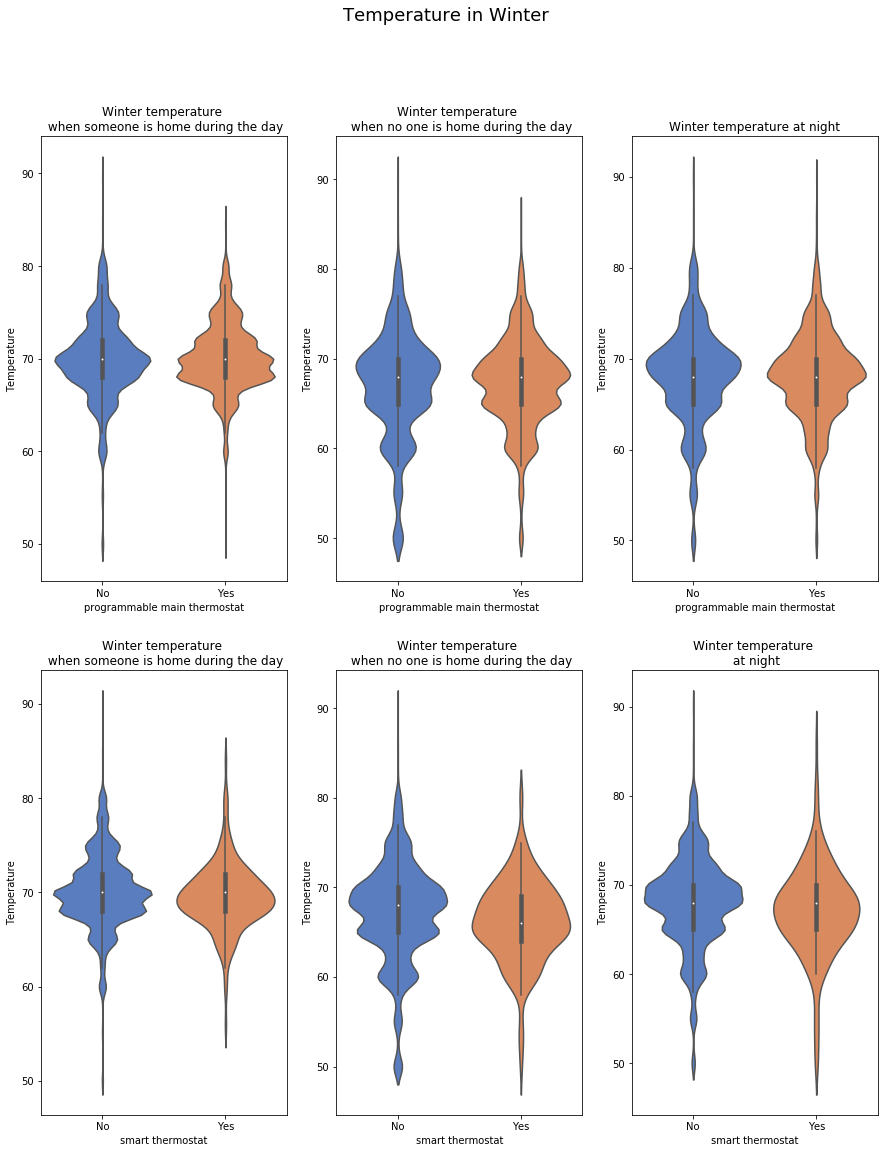

In [6]:
plt.subplots(2, 3, figsize=(15, 18))
plt.suptitle("Temperature in Winter", fontsize = 18)
plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.subplot(231)
sns.violinplot(
    y="winter temperature when someone is home during the day",
    x="programmable main thermostat",
    data=df_heated,
)
plt.title("Winter temperature \n when someone is home during the day")
plt.ylabel("Temperature")

plt.subplot(232)
sns.violinplot(
    y="winter temperature when no one is home during the day",
    x="programmable main thermostat",
    data=df_heated,
)
plt.title("Winter temperature \n when no one is home during the day")
plt.ylabel("Temperature")

plt.subplot(233)
sns.violinplot(
    y="winter temperature at night",
    x="programmable main thermostat",
    data=df_heated,
)
plt.title("Winter temperature at night")
plt.ylabel("Temperature")



plt.subplot(234)
sns.violinplot(
    y="winter temperature when someone is home during the day",
    x="smart thermostat",
    data=df_heated,
)
plt.title("Winter temperature \n when someone is home during the day")
plt.ylabel("Temperature")

plt.subplot(235)
sns.violinplot(
    y="winter temperature when no one is home during the day",
    x="smart thermostat",
    data=df_heated,
)
plt.title("Winter temperature \n when no one is home during the day")
plt.ylabel("Temperature")

plt.subplot(236)
sns.violinplot(
    y="winter temperature at night",
    x="smart thermostat",
    data=df_heated,
)
plt.title("Winter temperature \n at night")
plt.ylabel("Temperature")

plt.show()

We can see that people with programmable thermostats keep same temperature when someone is at home, as people without. But it's noticeable lower when no one is at home or at night.

Distribution of temperatures for homes with smart thermostats look smoother than those without or with regular programmable ones, instead of uneven binomial distribution, we see almost perfect normal one. 
Smother normal distribution makes households with smart thermostats easier to predict. 
50% quantile for temperature when someone at home or at night quantile is the same for people with smart thermostats and without, while temperature when no one at home is noticeably lower.
If our goal is to minimize consumption, it would make sense to promote using a smart thermostat. 


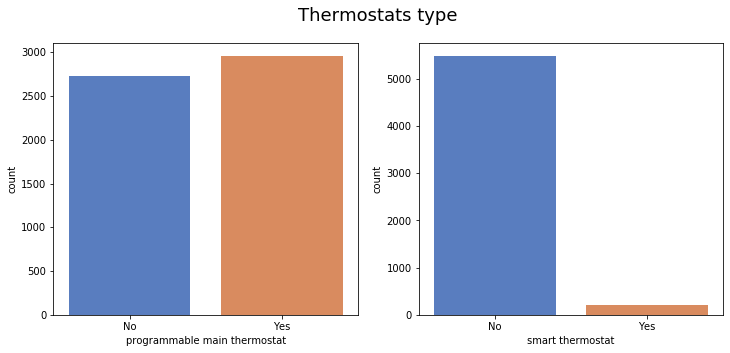

In [7]:
plt.subplots(1, 2, figsize=(12, 5))
plt.suptitle("Thermostats type", fontsize=18)
plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.subplot(121)
sns.countplot("programmable main thermostat", data=df)

plt.subplot(122)
sns.countplot("smart thermostat", data=df)

plt.show()

We saw how effective are start thermostats, yet only a small fraction of people used it in 2015. Hopefully, this percentage increased by 2019. 

While most households have programmable thermostat, they win only by a small fraction. A lot of people still don’t have even basic programmable thermostat. 


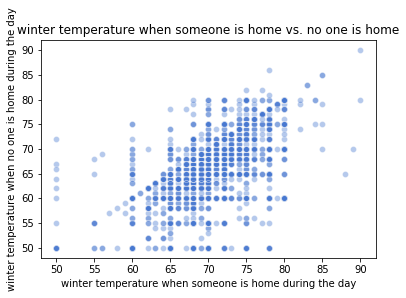

In [8]:
sns.scatterplot(
    x="winter temperature when someone is home during the day",
    y="winter temperature when no one is home during the day",
    data=df_heated,
    alpha=0.4,
)
plt.title("winter temperature when someone is home vs. no one is home")
plt.show()

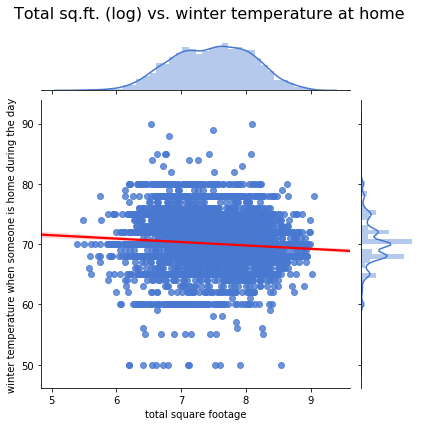

In [9]:
g = sns.jointplot(
    y="winter temperature when someone is home during the day",
    x=np.log(df_heated["total square footage"]),
    joint_kws={"line_kws": {"color": "red"}},
    data=df_heated,
    kind="reg",
)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Total sq.ft. (log) vs. winter temperature at home", fontsize=16)
plt.show()

While most people predictably keep winter temperature when someone is home during the day higher than when no one is at home, curiously, some people do the opposite. I wonder why. 

Also, the larger the home is, the harder to keep it warm. Winter temperature when someone is home during the day vs. total square footage plot shows that there is a negative trend. 


#### Temperature in Summer

In [10]:
df_cooled = df[df['air conditioning equipment used']=='Yes']

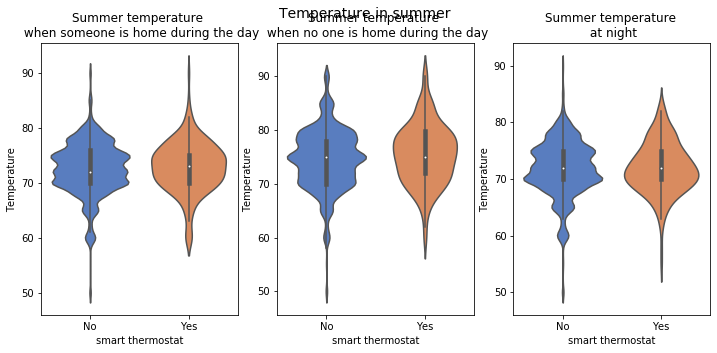

In [11]:
plt.subplots(1, 3, figsize=(12, 5))
plt.suptitle("Temperature in summer", fontsize=14)

plt.subplot(131)
sns.violinplot(
    y="summer temperature when someone is home during the day",
    x="smart thermostat",
    data=df_cooled,
)
plt.title("Summer temperature \n when someone is home during the day")
plt.ylabel("Temperature")

plt.subplot(132)
sns.violinplot(
    y="summer temperature when no one is home during the day",
    x="smart thermostat",
    data=df_cooled,
)
plt.title("Summer temperature \n when no one is home during the day")
plt.ylabel("Temperature")

plt.subplot(133)
sns.violinplot(y="summer temperature at night", x="smart thermostat", data=df_cooled)
plt.title("Summer temperature \n at night")
plt.ylabel("Temperature")

plt.show()

Summer temperatures plots shows similar story to the winter ones - smart thermostat help not to waste resources to cooling when no one needs it. 

# Inferential Statistical Analysis

Let’s take a look at the correlation matrix: 

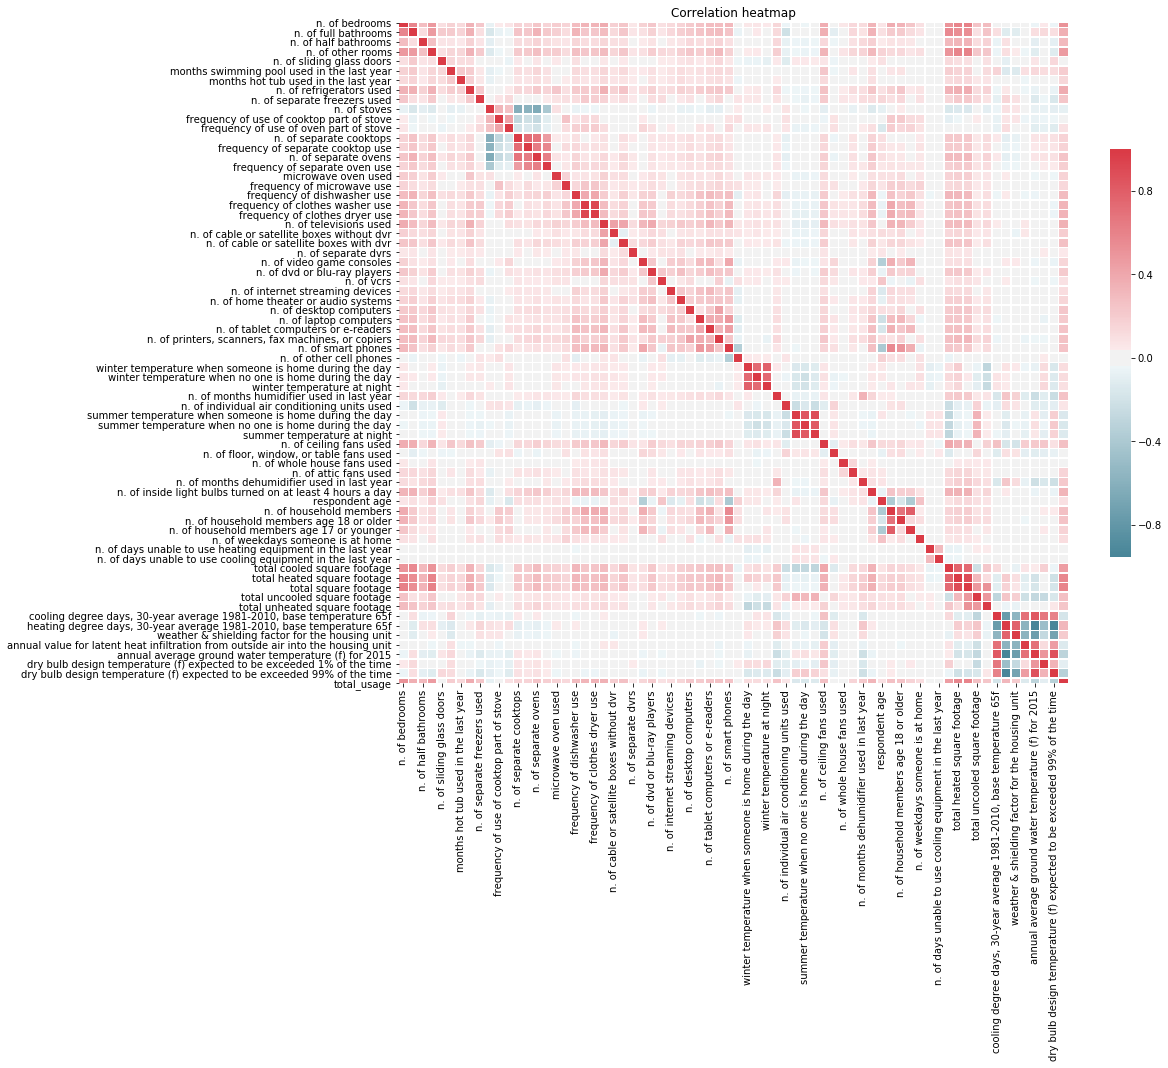

In [12]:
plt.figure(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(
    df.corr(), cmap=cmap, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5}
)
plt.title("Correlation heatmap")
plt.show()

We several see clear clusters among variables:
winter temperature (when someone home, no one at home, and at night);
summer temperature (when someone home, no one at home, and at night);
square footage (total, heated, cooled)
cooking equipment (like the number of stoves negatively correlated to the number of separate cooktops and ovens)


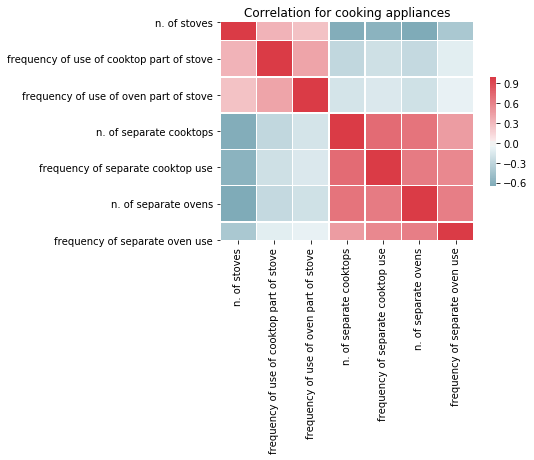

In [13]:
cooking = df.iloc[:, 48:60]

sns.heatmap(
    cooking.corr(),
    cmap=cmap,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)
plt.title("Correlation for cooking appliances")
plt.show()

The size of the home is predictably the most important factor, so is the number of rooms, refrigerators used, the number of televisions used, frequency of clothes dryer use, a number of inside light bulbs turned on at least 4 hours a day. The top 20 variables with the highest correlation with the target variable are shown below.


In [14]:
corr = df.corr()
corr.reindex(corr.total_usage.abs().sort_values().index).total_usage.tail(20)

n. of ceiling fans used                                                    0.272320
n. of household members                                                    0.274737
total uncooled square footage                                              0.274839
frequency of dishwasher use                                                0.293644
annual average ground water temperature (f) for 2015                      -0.306673
n. of half bathrooms                                                       0.310875
heating degree days, 30-year average 1981-2010, base temperature 65f       0.318482
frequency of clothes washer use                                            0.331121
n. of inside light bulbs turned on at least 4 hours a day                  0.333454
dry bulb design temperature (f) expected to be exceeded 99% of the time   -0.338948
frequency of clothes dryer use                                             0.342721
n. of televisions used                                                     0

Let's take a look at scatterplots with the most correlated variables. 

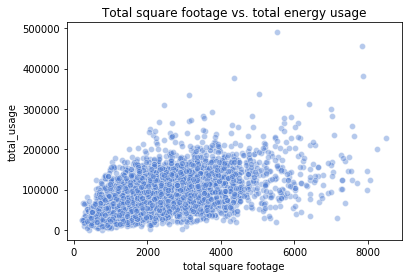

In [15]:
sns.scatterplot(
    x=(df["total square footage"]), y=df["total_usage"], data=df, alpha=0.4
)
plt.title("Total square footage vs. total energy usage")
plt.show()

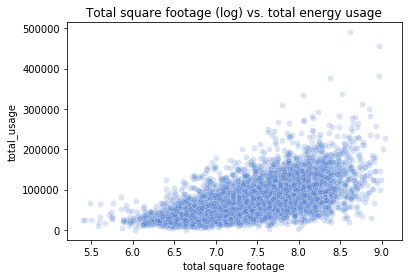

In [16]:
sns.scatterplot(
    x=np.log(df["total square footage"]), y=df["total_usage"], data=df, alpha=0.2
)
plt.title("Total square footage (log) vs. total energy usage")
plt.show()

Log of total square footage shows cleared picture. Knowing the area of the home, we can easily predict upper bound - it’s a diagonal line, with no outliers beyond it. 

Total square footage is so powerful predictor variable, that in order to see the effect of some categorical variables (below), I’ll add energy used by sq ft: 'btu_per_sqft' variable.

In [17]:
df['btu_per_sqft'] = df['total_usage'] / df["total square footage"] 

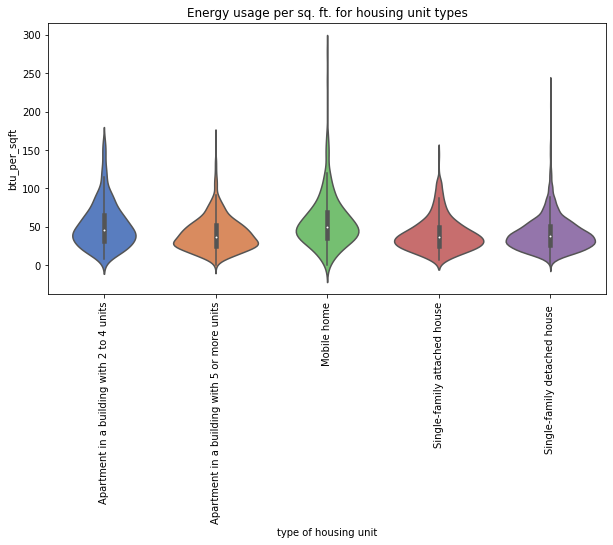

In [18]:
plt.figure(figsize=(10, 5))

sns.violinplot(y="btu_per_sqft", x="type of housing unit", data=df)
plt.xticks(rotation=90)
plt.title("Energy usage per sq. ft. for housing unit types")
plt.show()

From Energy usage per sq. ft. for housing unit types plot, we see that apartments a building with 5 or more units are much energy effective than those in building with 2-4 units. Single-family houses have narrower distribution than apartments, accordingly, easier to predict. 


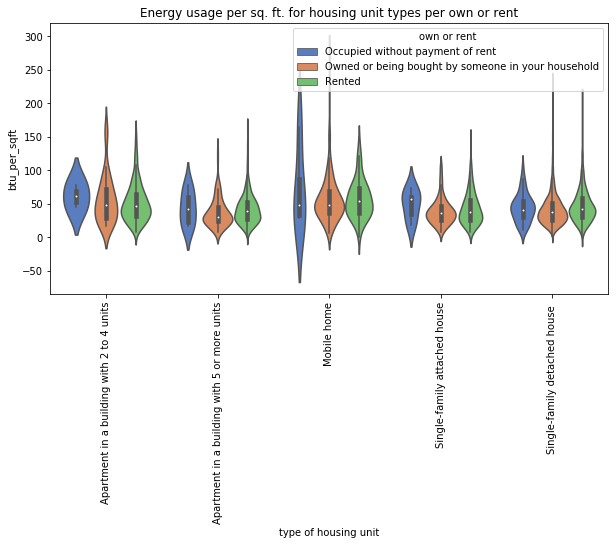

In [19]:
plt.figure(figsize=(10, 5))

sns.violinplot(y="btu_per_sqft", x="type of housing unit", hue="own or rent", data=df)
plt.xticks(rotation=90)
plt.title("Energy usage per sq. ft. for housing unit types per own or rent")
plt.show()

People who rent spend more per sq ft than whose who owns for every unit type, except for 2-4 units apartments. Those, knowing if the unit is owner or renters occupied, we can expect higher consumption. 
People who occupied without payment of rent spend so much more. Perhaps, they are not financially responsible for utilities as well, that’s why not eager to use thoughtfully. May be programs which will educate people about the environmental impact of wasteful use for such people could make a difference, if money can’t 

T-test below confirms that average consumption per sq ft, as well as total consumption for people who owns and who rents are different (significant p-value) 

In [20]:
ttest_ind(
    df[df["own or rent"] == "Owned or being bought by someone in your household"][
        "btu_per_sqft"
    ],
    df[df["own or rent"] == "Rented"]["btu_per_sqft"],
    equal_var=False,
)

Ttest_indResult(statistic=-5.092762322269505, pvalue=3.740187974122832e-07)

In [21]:
ttest_ind(df[df['own or rent'] == 'Owned or being bought by someone in your household']['total_usage'], 
          df[df['own or rent'] == 'Rented']['total_usage'], equal_var = False)

Ttest_indResult(statistic=35.35729493403672, pvalue=3.1712864160435686e-241)

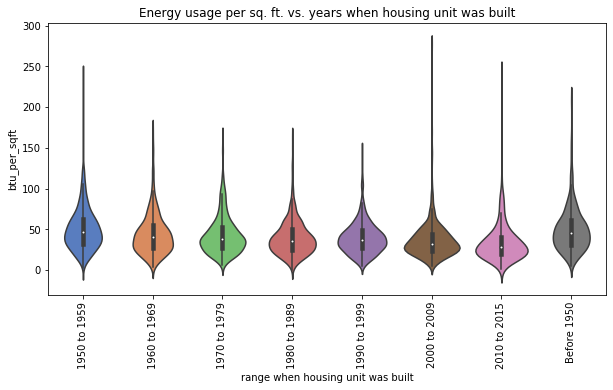

In [22]:
plt.figure(figsize=(10,5))

sns.violinplot(
    y="btu_per_sqft",
    x="range when housing unit was built",
    data=df,
)
plt.xticks(rotation=90)
plt.title("Energy usage per sq. ft. vs. years when housing unit was built")
plt.show()

This plot shows a clear trend that newer houses are more energy efficient. This can serve as anther reason to persuade the contractor's client to build new construction, rather than renovate.  

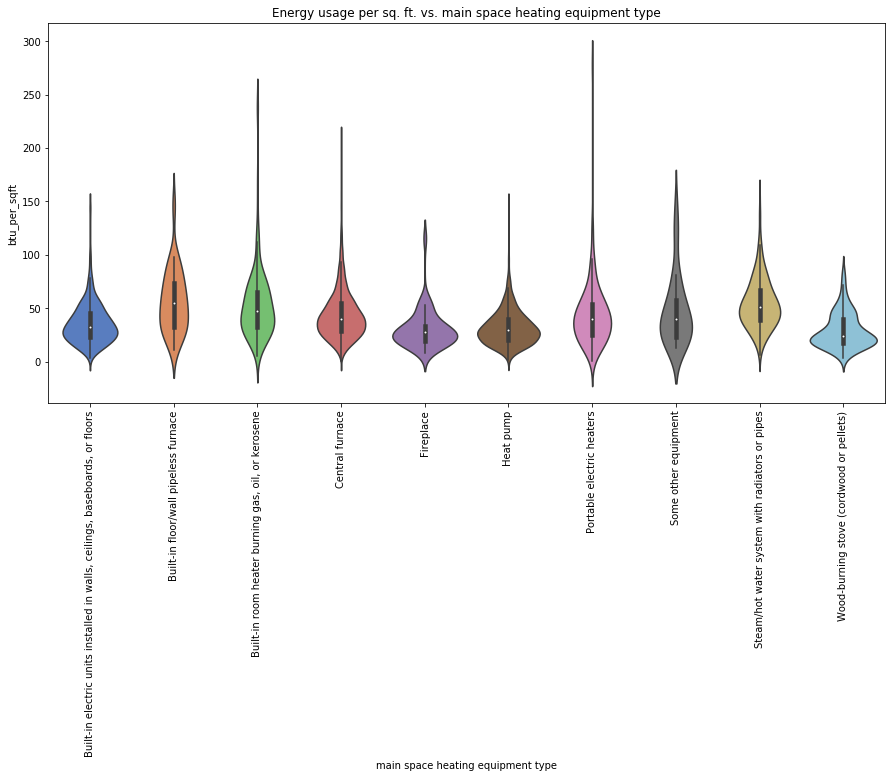

In [23]:
plt.figure(figsize=(15, 7))

sns.violinplot(y="btu_per_sqft", x="main space heating equipment type", data=df)
plt.xticks(rotation=90)
plt.title("Energy usage per sq. ft. vs. main space heating equipment type")
plt.show()

Energy usage per sq. ft. vs. main space heating equipment type plot basically shows efficiency of heating equipment. For example, a steam/hot water system with radiators or pipes is visibly less effective than the central furnace, and both are outperformed by heat pump. 
For potential HVAC company, this can be valuable information to convince their customers to change the system to a heat pump. 


Let's test hypotheses that having or not having certain appliances in home affects total spending:

In [24]:
ttest_ind(df[df['have clothes washer in home'] == 'Yes']['total_usage'], 
          df[df['have clothes washer in home'] == 'No']['total_usage'], equal_var = False)

Ttest_indResult(statistic=38.82491809644922, pvalue=3.1335450312825944e-240)

In [25]:
ttest_ind(df[df['have clothes dryer in home'] == 'Yes']['total_usage'], 
          df[df['have clothes dryer in home'] == 'No']['total_usage'], equal_var = False)

Ttest_indResult(statistic=37.8657223187164, pvalue=2.437247005320325e-239)

In [26]:
ttest_ind(df[df['have dishwasher'] == 'Yes']['total_usage'], 
          df[df['have dishwasher'] == 'No']['total_usage'], equal_var = False)

Ttest_indResult(statistic=14.678674690389675, pvalue=1.9357746660595412e-47)

In [27]:
ttest_ind(df[df['coffee maker used'] == 'Yes']['total_usage'], 
          df[df['coffee maker used'] == 'No']['total_usage'], equal_var = False)

Ttest_indResult(statistic=12.309295624570817, pvalue=2.9079456766606326e-34)

Predictably, we have to reject the null hypothesis that having or not having clothes washer in home has no effect on consumption. Same for clothes dryer, dishwasher, and even coffee maker. 